In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define computational domain size
Nx, Ny, Nz = 10, 10, 5  # Grid size
resolution = 10  # Grid resolution (points per unit length)

dx = 1/resolution # 0.1
dt = 1/(2*resolution) # 0.05

# Create a 3D computational cell
cell_size = mp.Vector3(Nx, Ny, Nz)

# Define a Gaussian point source at the center
wavelength = 1.0  # Central wavelength
freq = 1 / wavelength  # Frequency
source = mp.Source(
    src=mp.GaussianSource(frequency=freq, fwidth=0.05 * freq * 2 * np.pi),
    # src=mp.ContinuousSource(frequency=freq, fwidth=0.2 * freq),
    component=mp.Ex,  
    center=mp.Vector3(0, 0, 0)  # Positioned at the center
)

In [3]:
# Set up the simulation with vacuum and a single source
sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    sources=[source],
    boundary_layers=[mp.PML(1.0)],  # Absorbing boundaries to avoid reflections
)

# Set up DFT monitor for Ex at x = Nx/2 plane
freq_monitor_start = 0.9 * freq
freq_monitor_end = 1.15 * freq
freq_monitor_step = 0.01 * freq

num_freqs = int((freq_monitor_end - freq_monitor_start) / freq_monitor_step) + 1
frequencies = np.linspace(freq_monitor_start, freq_monitor_end, num_freqs)  # Define a frequency range for DFT
dft_monitor = sim.add_dft_fields([mp.Ex], frequencies, 
                                 center=mp.Vector3(0, 0, 0), 
                                 size=mp.Vector3(Nx, Ny, 0))


In [4]:
vals_f = []
vals_t = []

def get_slice(sim):
    vals_f.append(sim.get_dft_array(dft_monitor, mp.Ex, 11))  # Pick a middle frequency)
    vals_t.append(sim.get_array(center=mp.Vector3(0, 0, 0), size=mp.Vector3(Nx, Ny, 0), component=mp.Ex))

total_time = 100
time_interval = 5

sim.run(mp.at_every(time_interval, get_slice),
        until=total_time)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000142813 s
Working in 3D dimensions.
Computational cell is 10 x 10 x 5 with resolution 10
time for set_epsilon = 0.434586 s
-----------
Meep progress: 19.85/100.0 = 19.9% done in 4.0s, 16.2s to go
on time step 397 (time=19.85), 0.0100868 s/step
Meep progress: 45.1/100.0 = 45.1% done in 8.0s, 9.8s to go
on time step 902 (time=45.1), 0.00793442 s/step
Meep progress: 70.35000000000001/100.0 = 70.4% done in 12.0s, 5.1s to go
on time step 1407 (time=70.35), 0.0079279 s/step
Meep progress: 95.5/100.0 = 95.5% done in 16.0s, 0.8s to go
on time step 1910 (time=95.5), 0.00795772 s/step
run 0 finished at t = 100.0 (2000 timesteps)


<Figure size 1800x500 with 0 Axes>

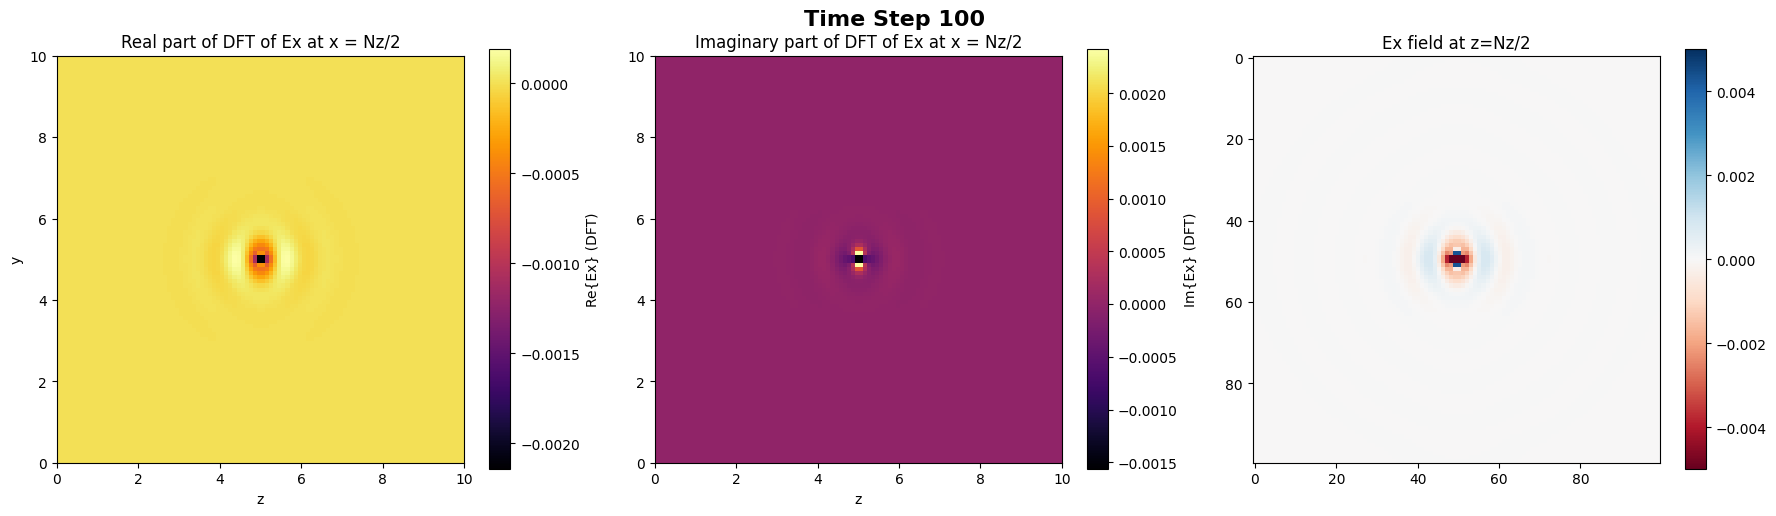

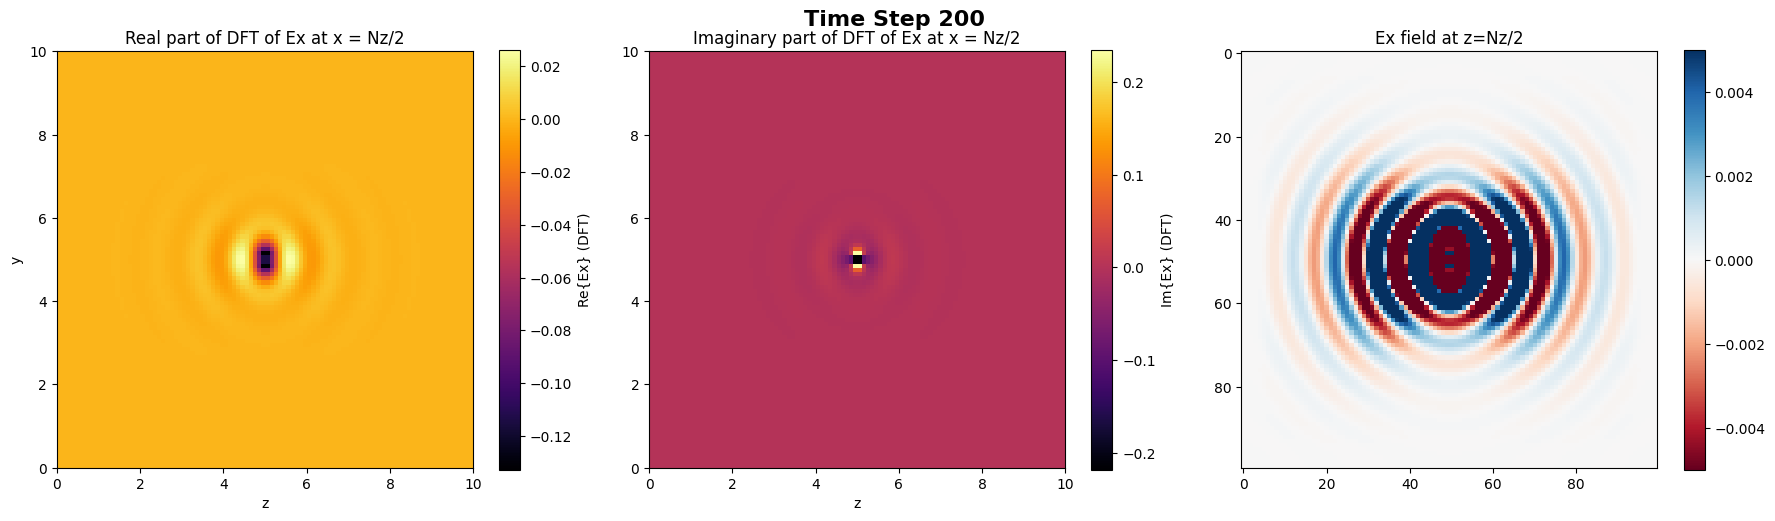

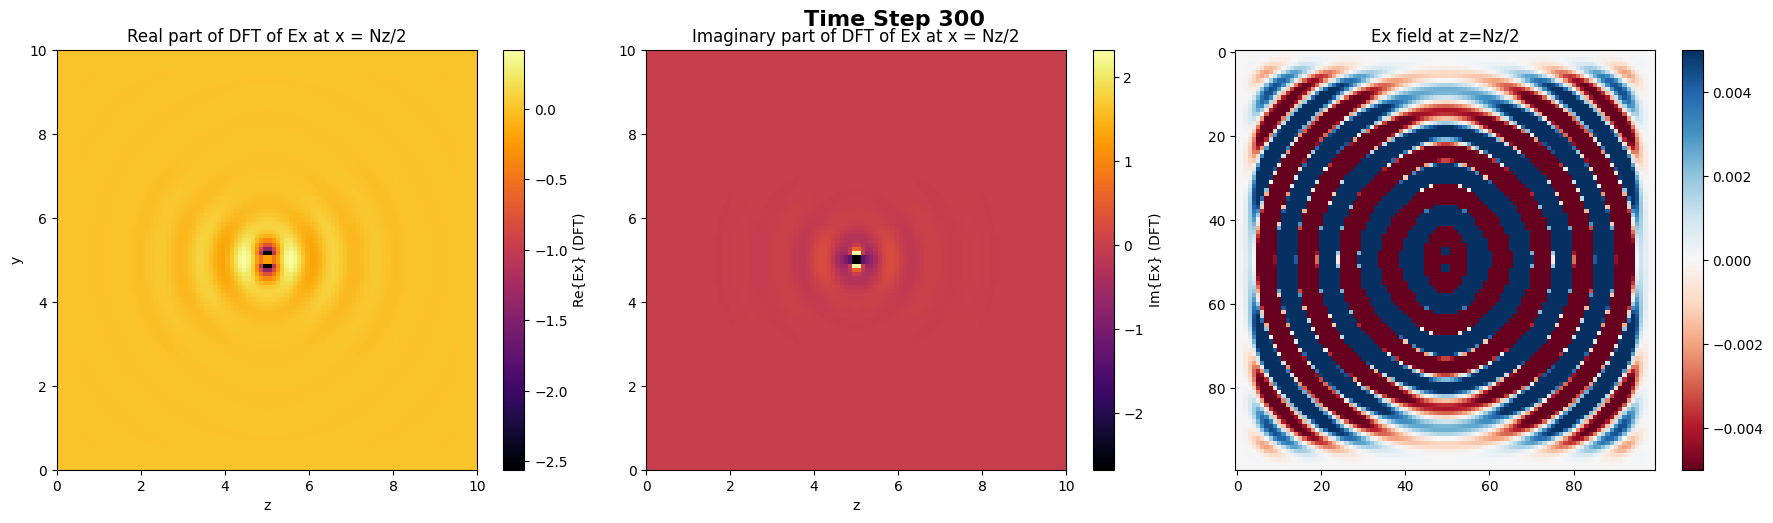

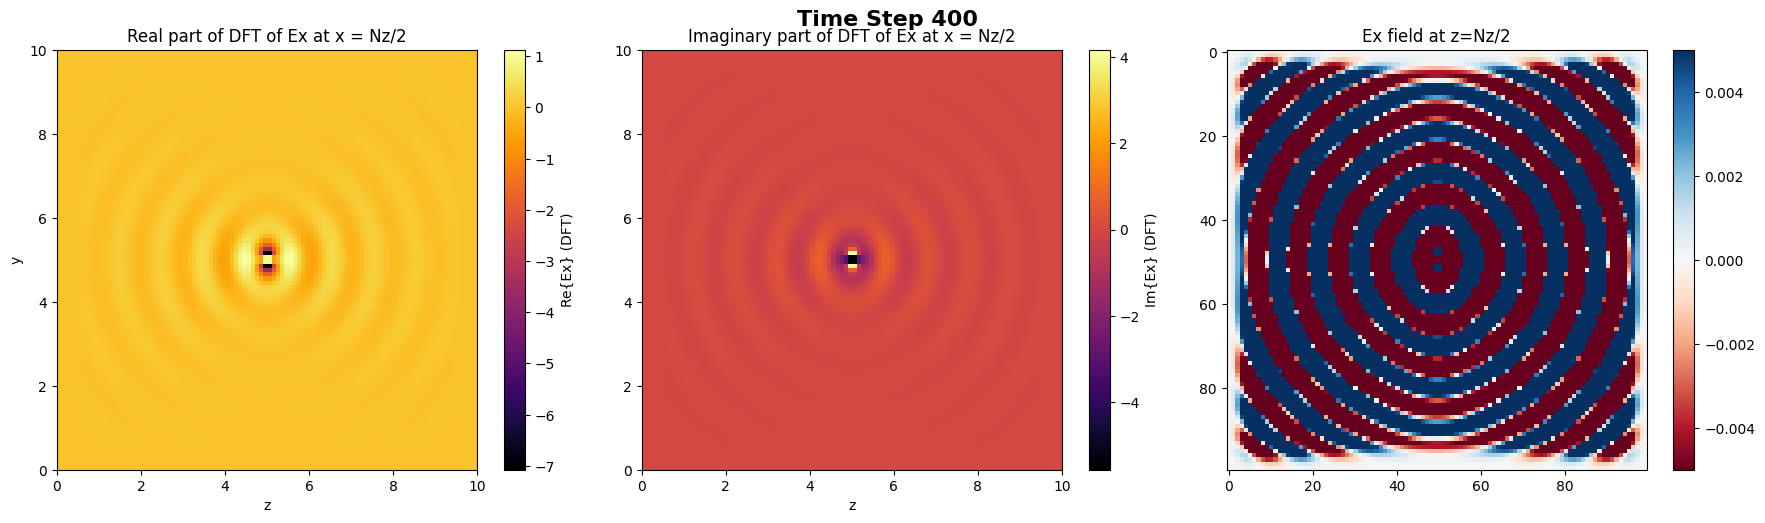

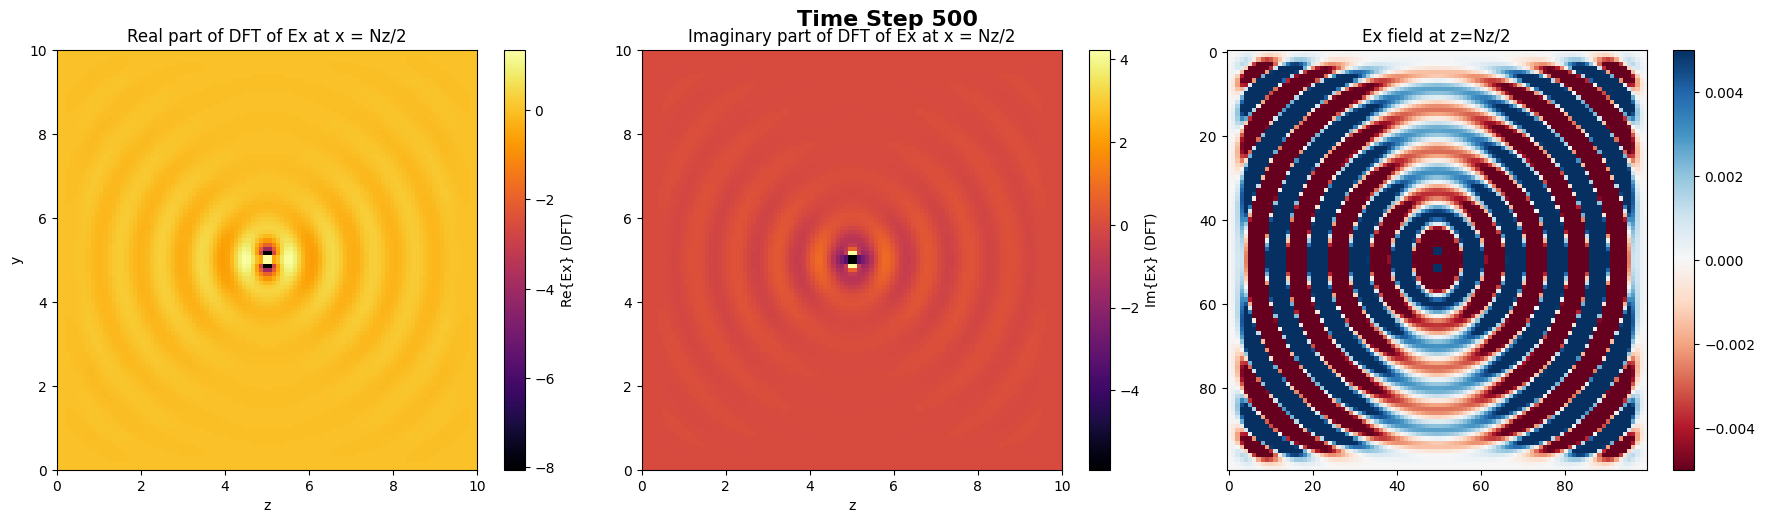

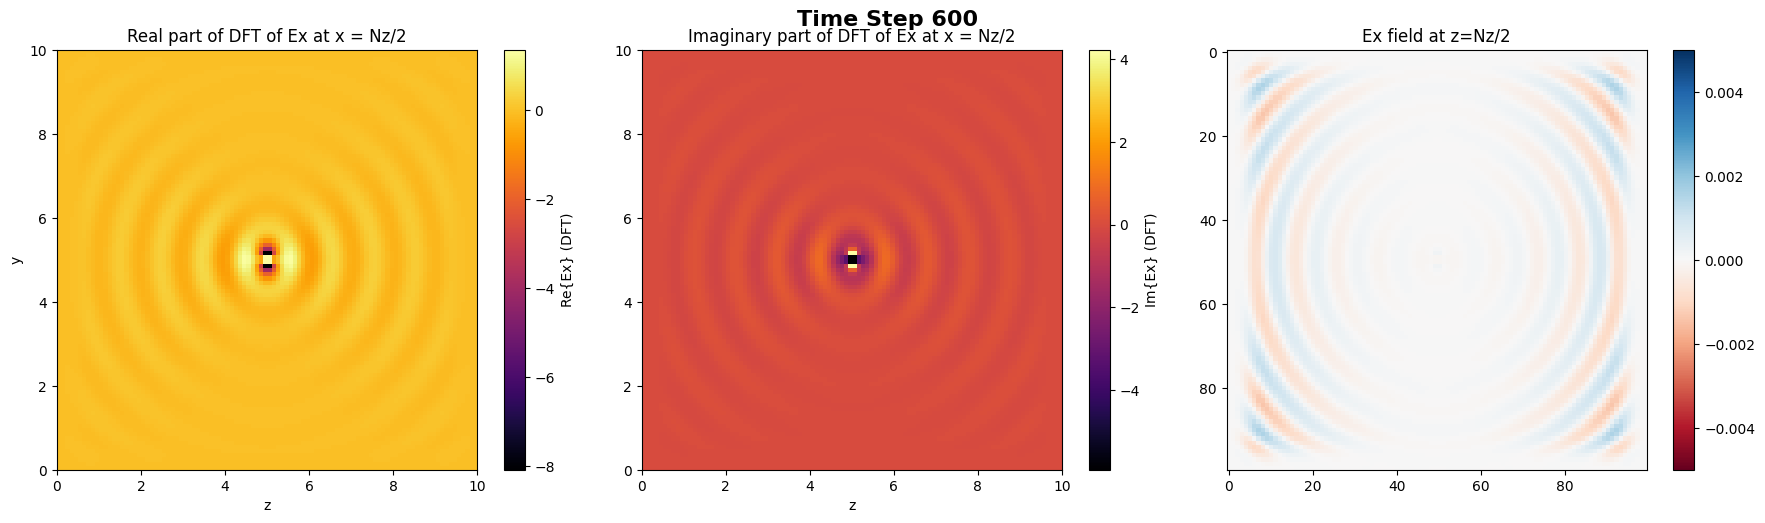

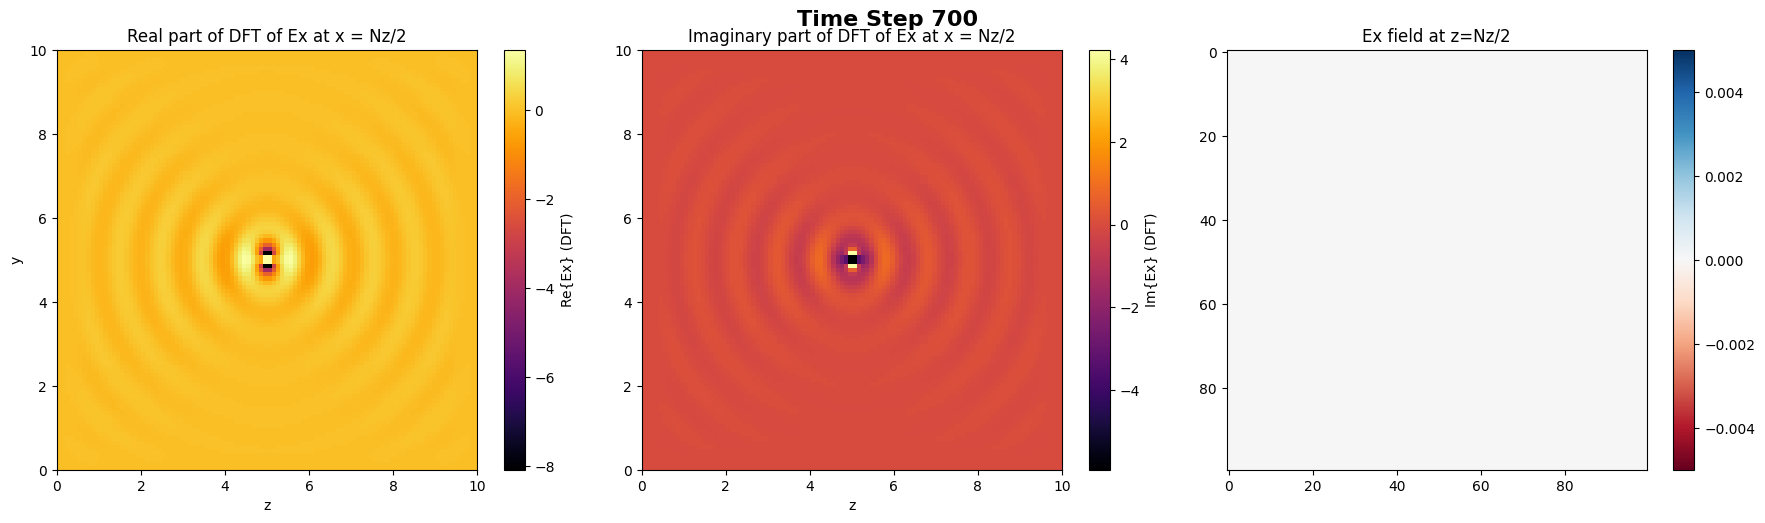

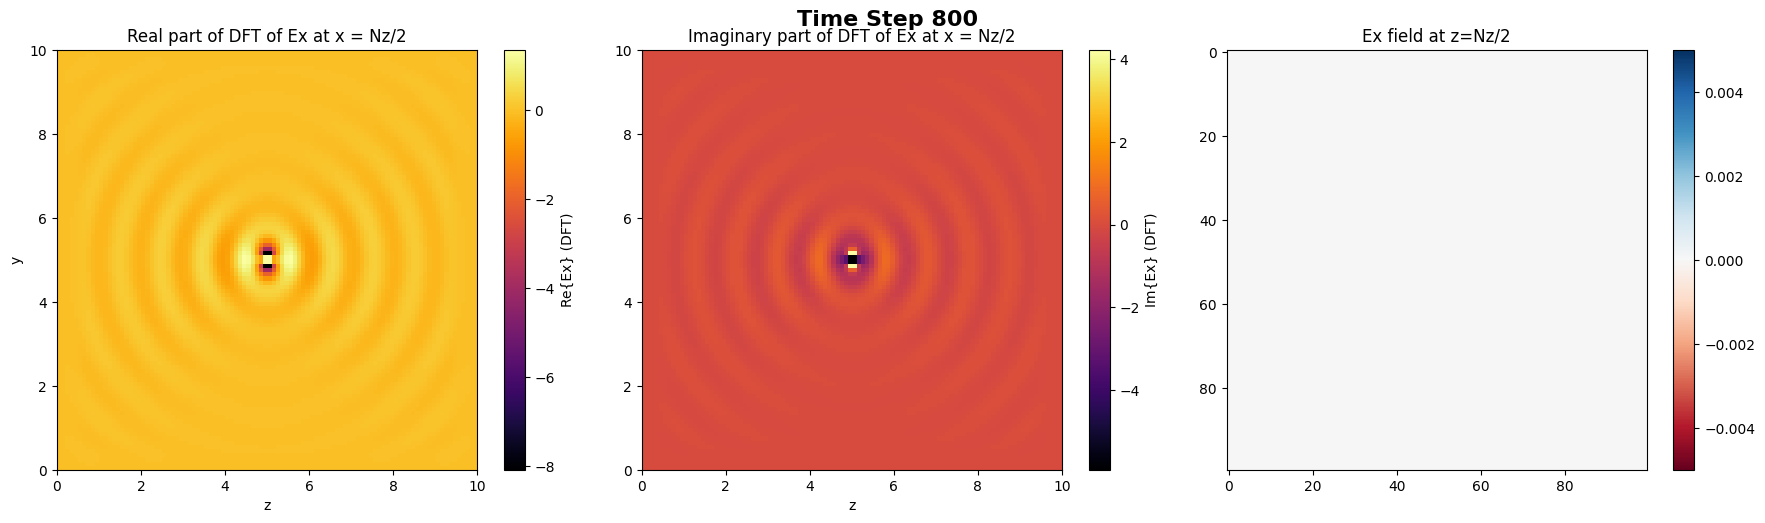

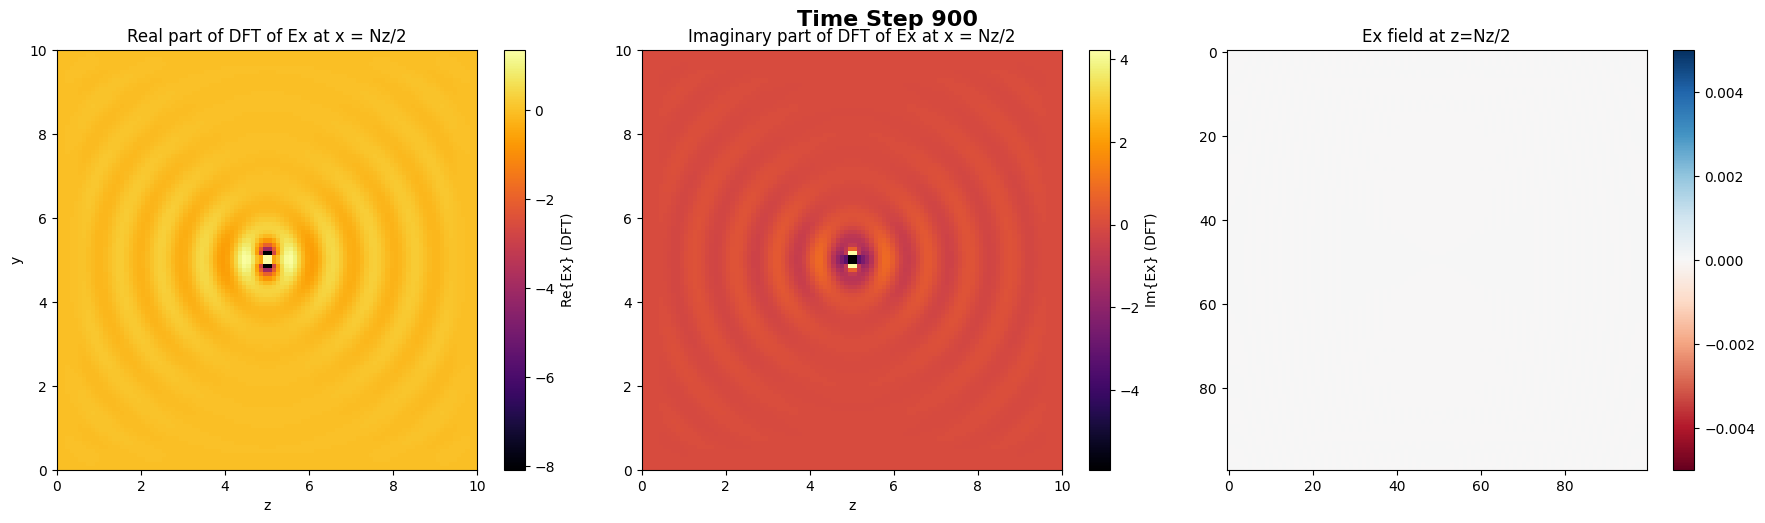

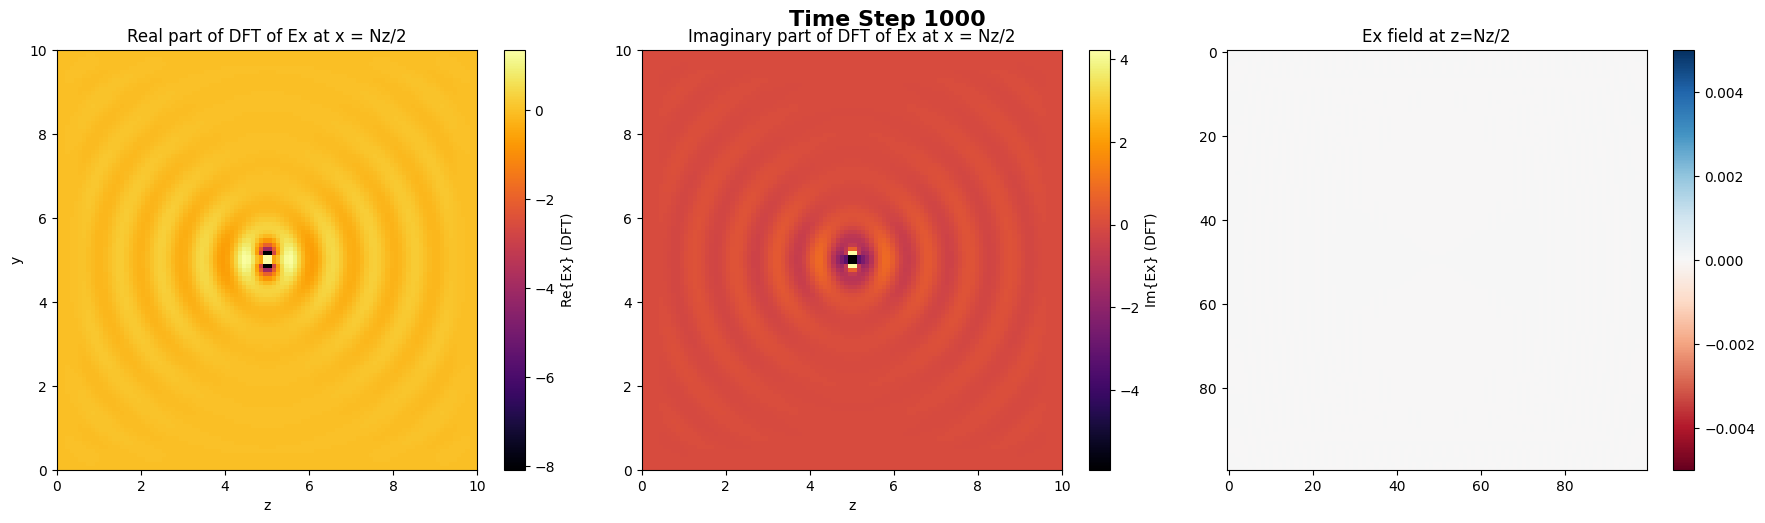

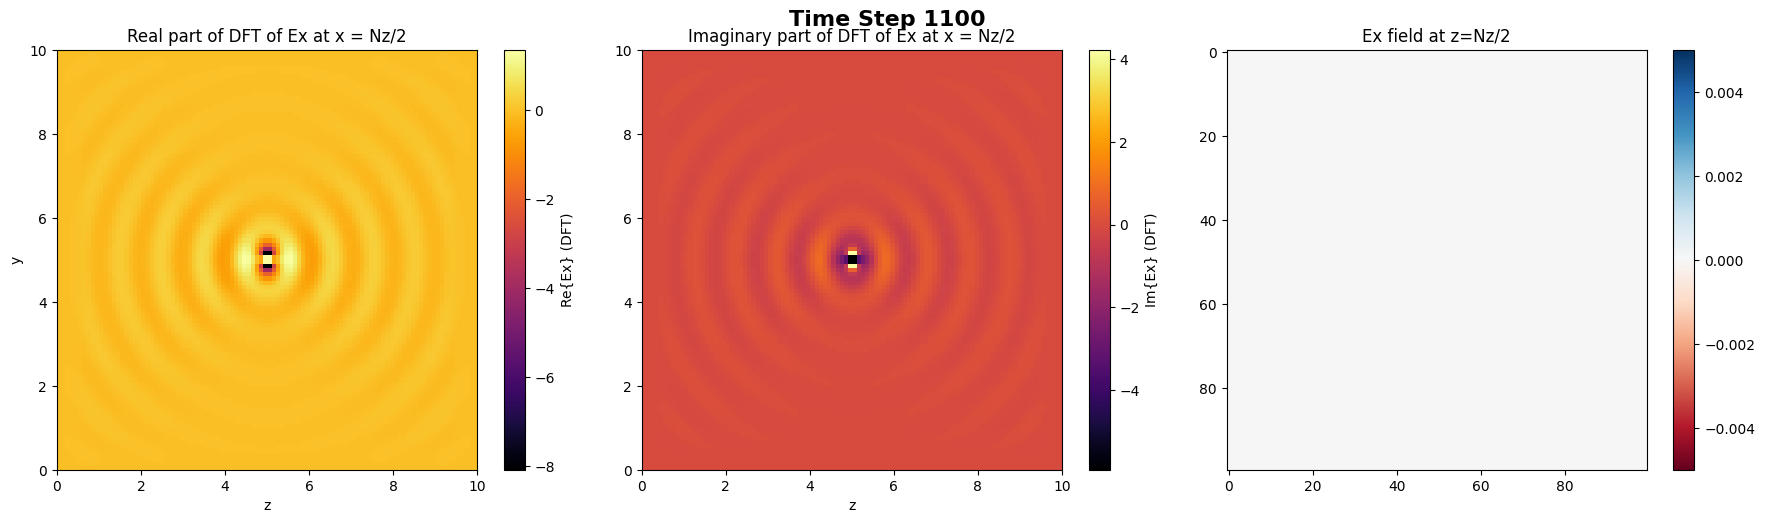

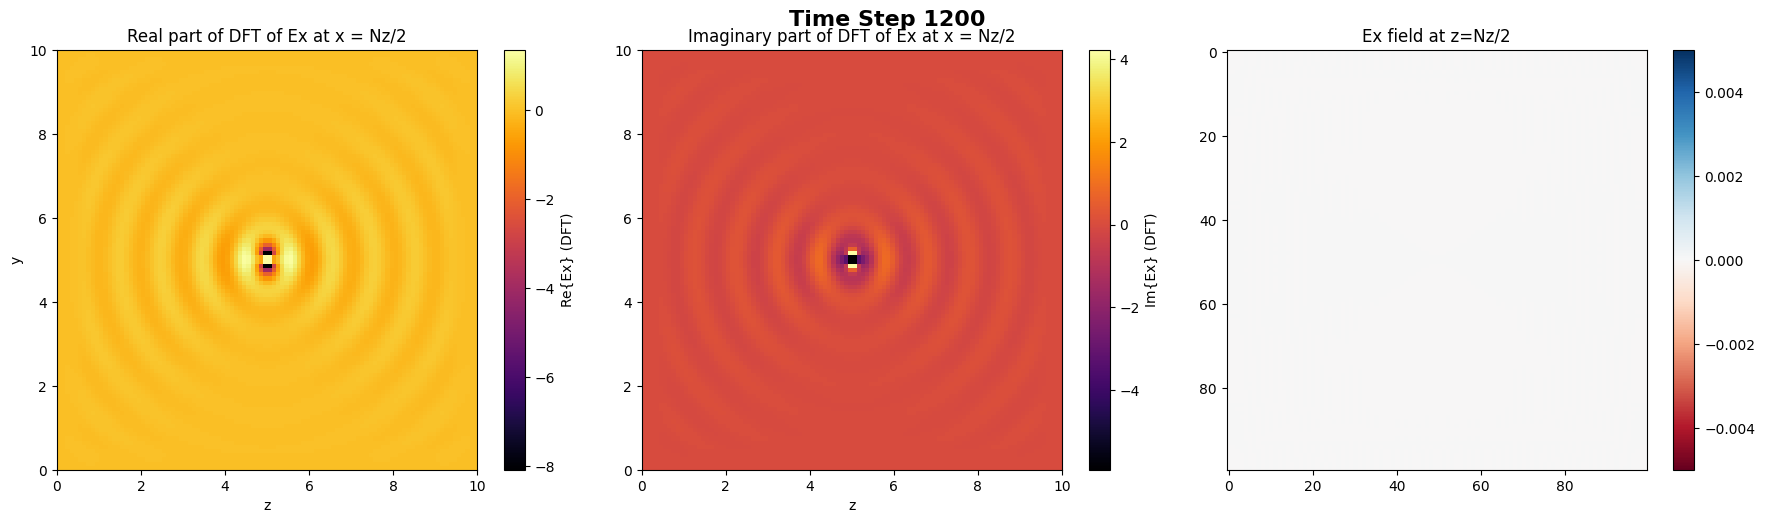

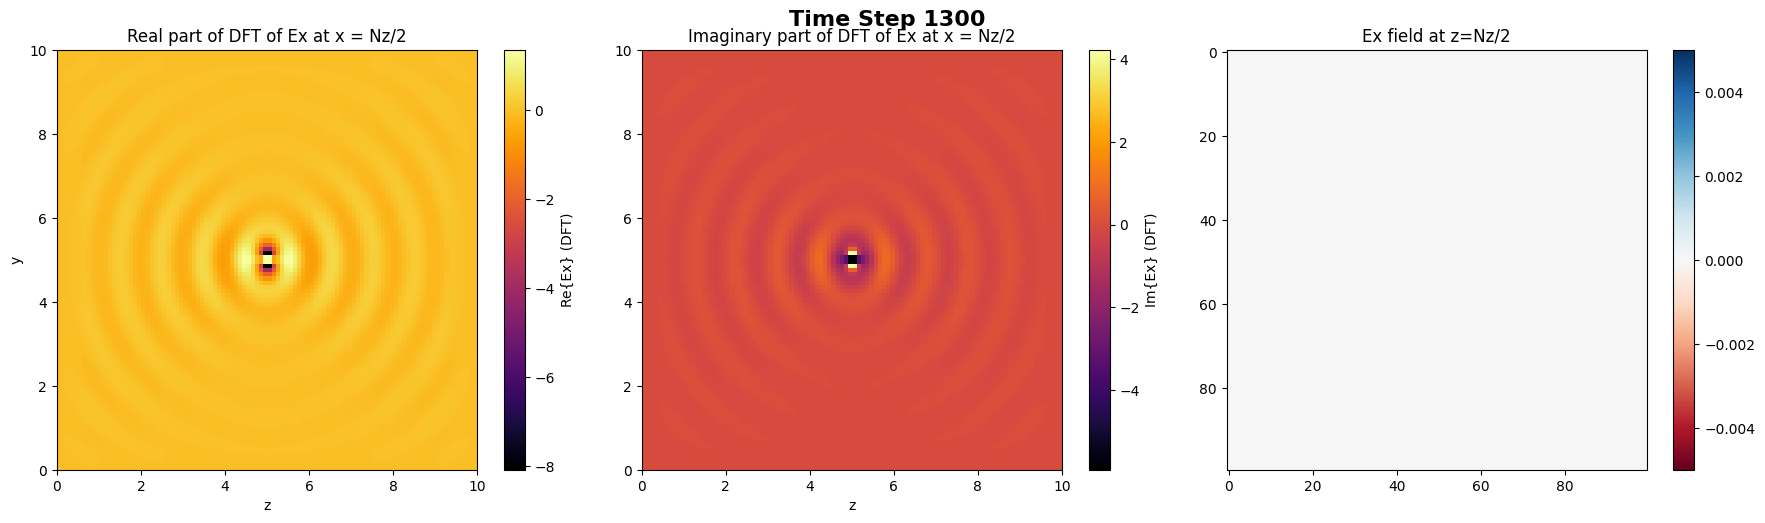

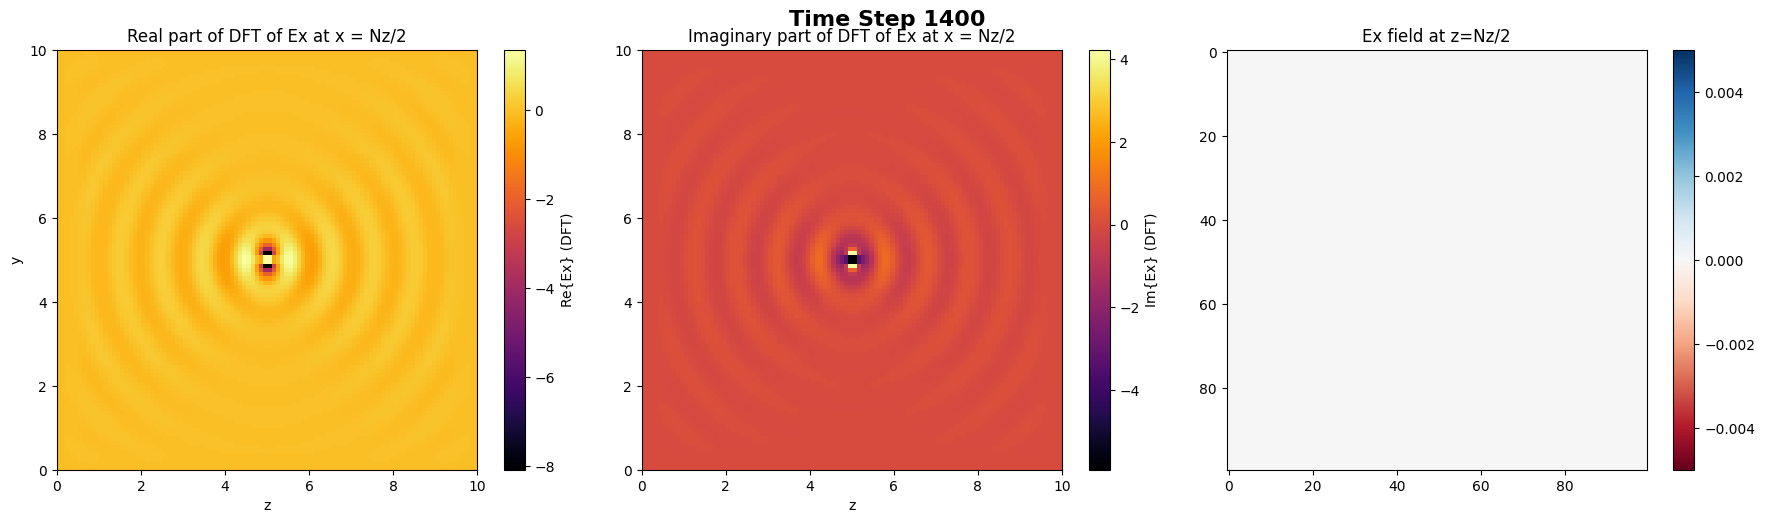

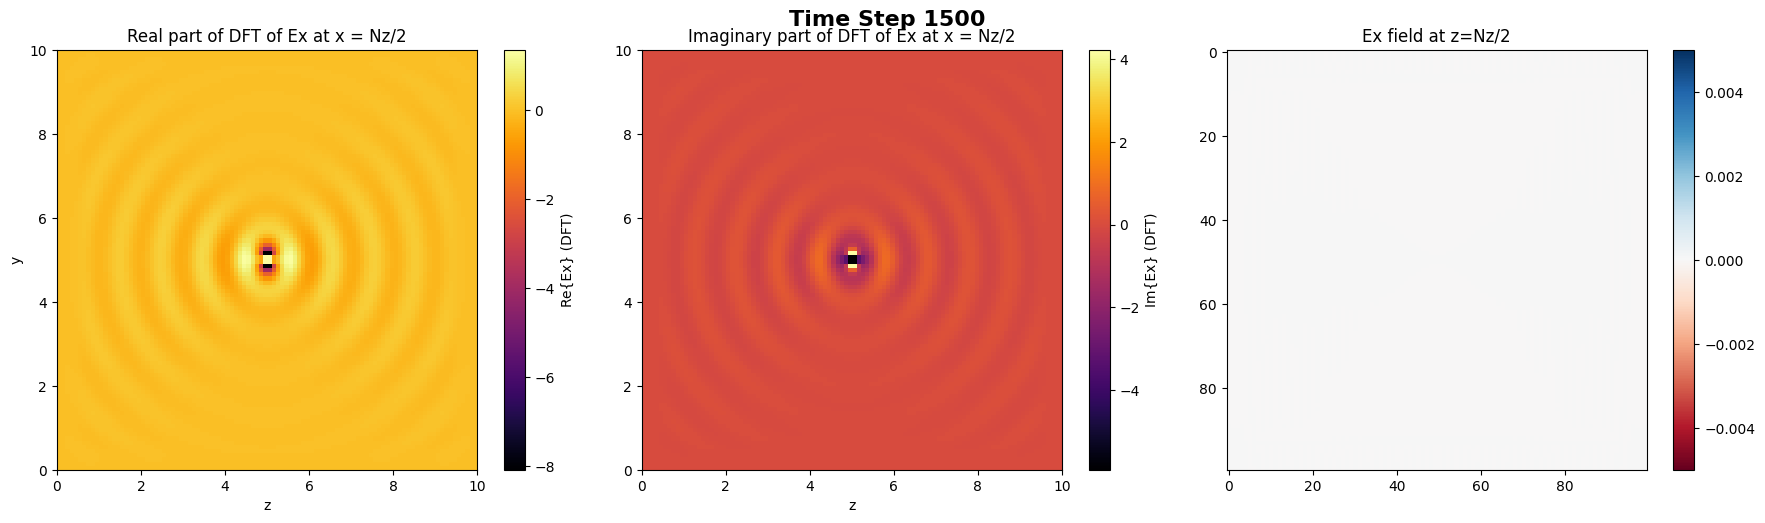

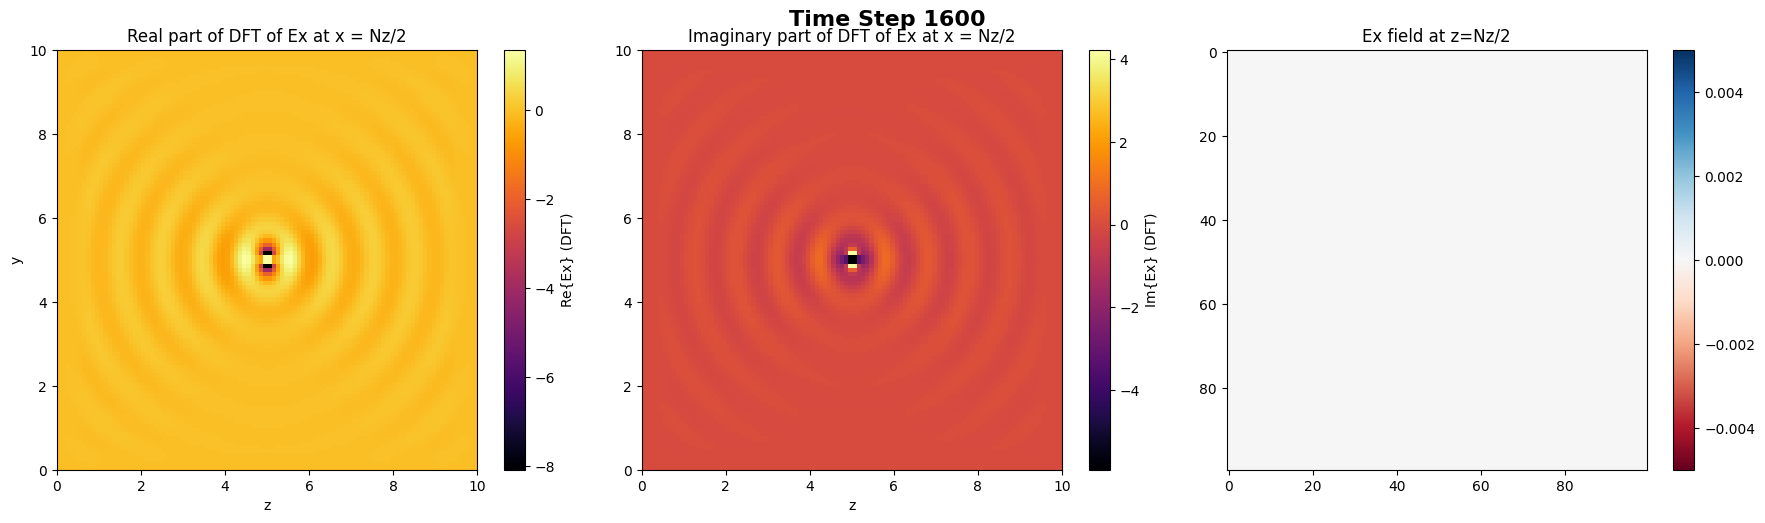

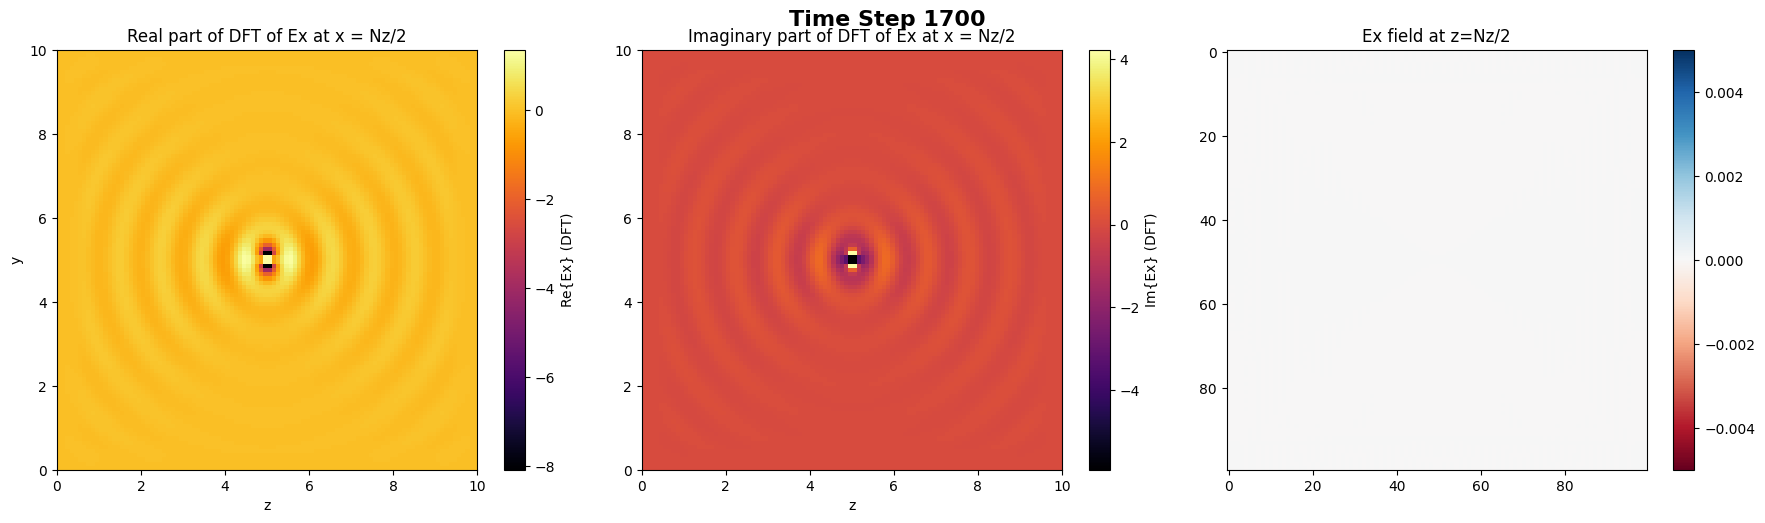

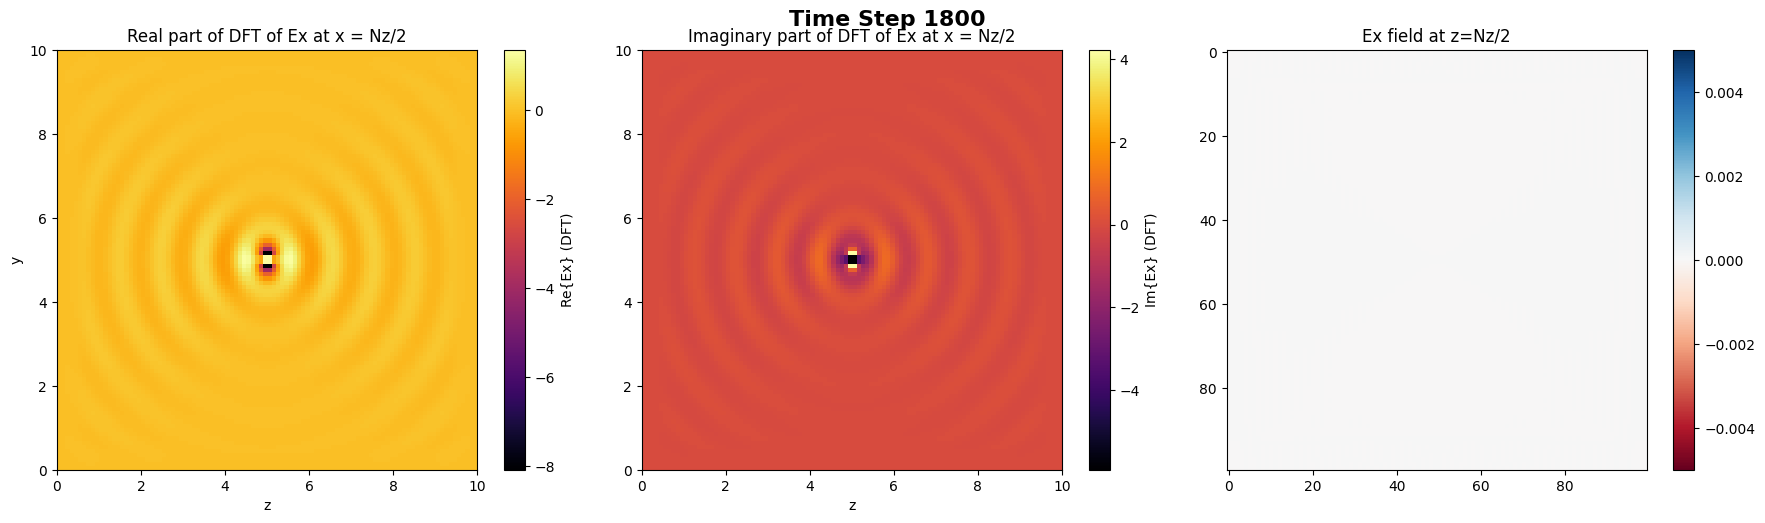

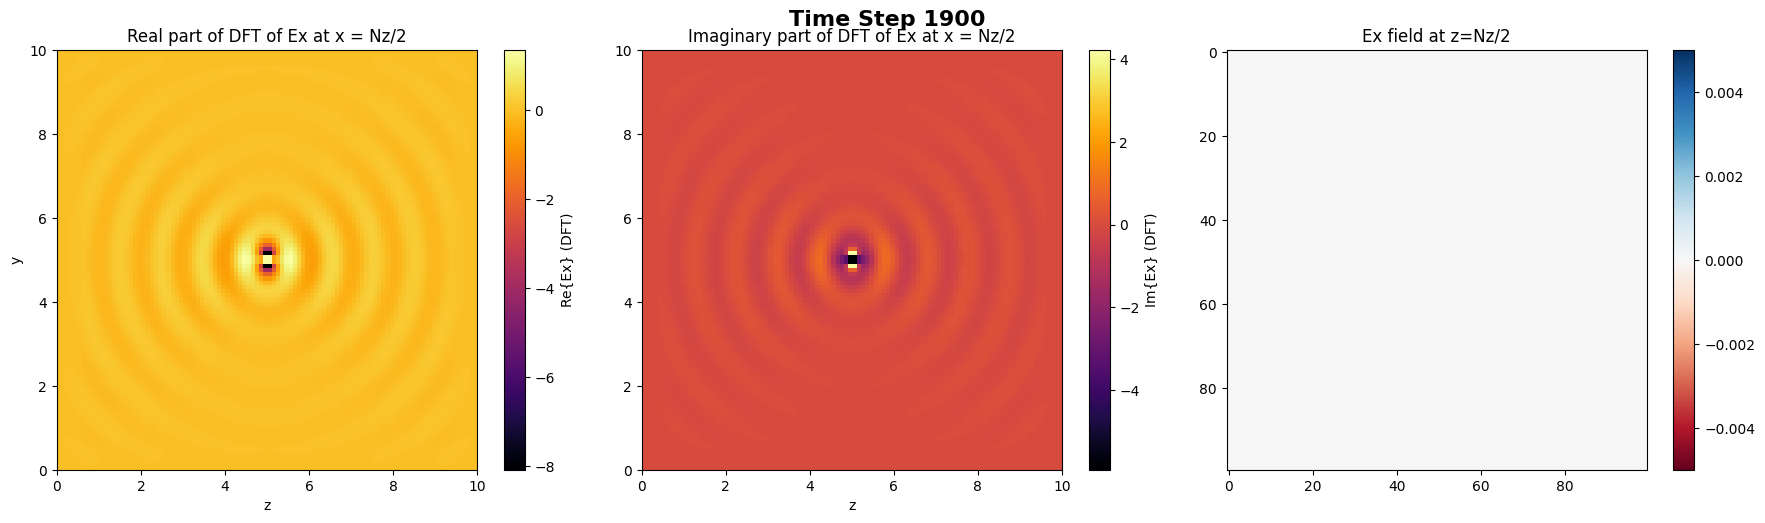

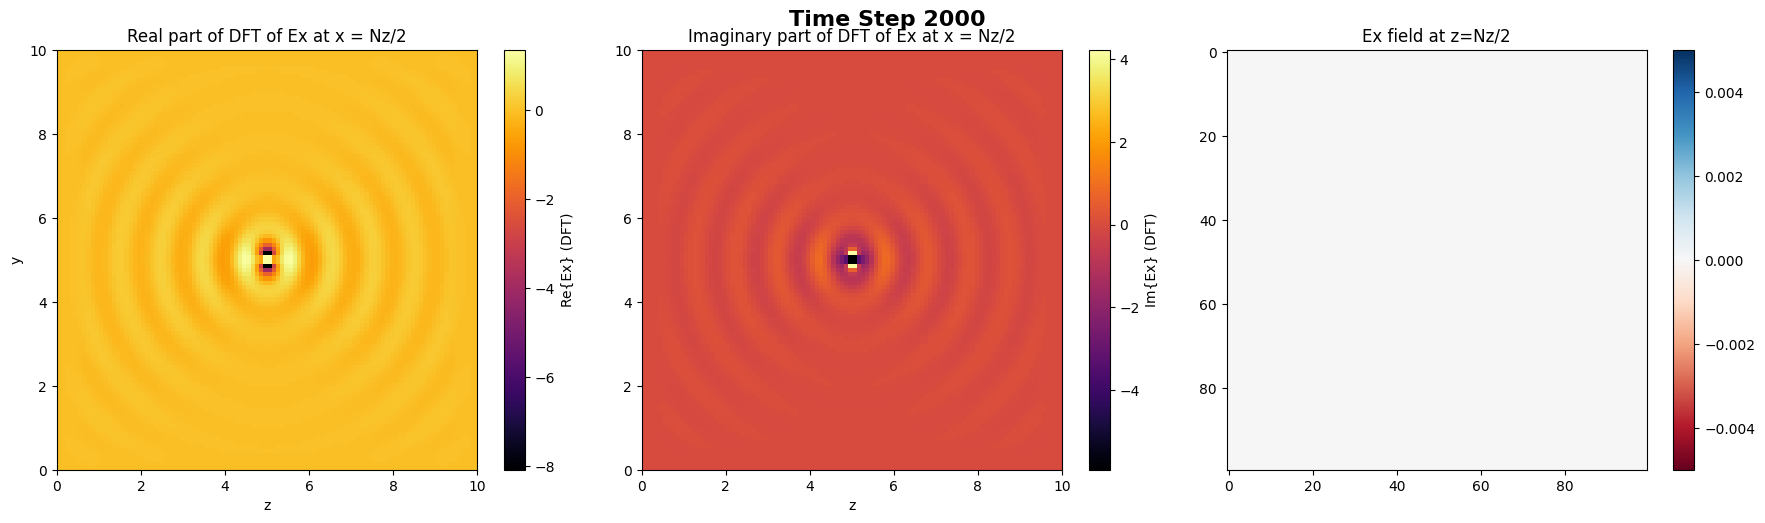

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))  # Set figure size

for i in range(int(total_time/time_interval)):
    Ex_dft_real = np.real(vals_f[i]).reshape(Nx*resolution, Ny*resolution)
    Ex_dft_imag = np.imag(vals_f[i]).reshape(Nx*resolution, Ny*resolution)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create three subplots
    fig.suptitle(f"Time Step {(i+1)*100}", fontsize=16, fontweight='bold')

    # First subplot: Real part of DFT of Ex
    im1 = axes[0].imshow(Ex_dft_real, cmap='inferno', extent=[0, Ny, 0, Nx])
    fig.colorbar(im1, ax=axes[0], label='Re{Ex} (DFT)')
    axes[0].set_title("Real part of DFT of Ex at x = Nz/2")
    axes[0].set_xlabel("z")
    axes[0].set_ylabel("y")

    # Second subplot: Imaginary part of DFT of Ex
    im2 = axes[1].imshow(Ex_dft_imag, cmap='inferno', extent=[0, Ny, 0, Nx])
    fig.colorbar(im2, ax=axes[1], label='Im{Ex} (DFT)')
    axes[1].set_title("Imaginary part of DFT of Ex at x = Nz/2")
    axes[1].set_xlabel("z")

    # Third subplot: Time-domain field of Ex
    im3 = axes[2].imshow(vals_t[i], cmap='RdBu', vmin=-0.005, vmax=0.005)
    fig.colorbar(im3, ax=axes[2])
    axes[2].set_title("Ex field at z=Nz/2")

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


In [6]:
# import matplotlib.pyplot as plt

# plt.figure()
# for i in range(int(total_time/time_interval)):
#     Ex_dft = vals_f[i].reshape(Ny*resolution, Nz*resolution)
#     # Plot frequency-domain response
#     plt.figure(figsize=(6,5))
#     plt.imshow(Ex_dft, cmap='inferno', extent=[0, Nz, 0, Ny])
#     plt.colorbar(label='|Ex| (DFT)')
#     plt.title("DFT of Ex at x = Nx/2")
#     plt.xlabel("z")
#     plt.ylabel("y")
#     plt.show()

In [7]:
# Run simulation
#sim.run(until=20)

